In [67]:
import pandas as pd
import numpy as np

In [68]:
# Quick and dirty, just want to save the time of typing out each individual column name
temp_names = '''
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.
'''

temp_names = temp_names.split('. ')
col_names = [name.split(':')[0] for name in temp_names]
col_names.pop(0) # Since I got an unwanted newline character to start 
cars_df = pd.read_csv('imports-85.data', names=col_names)
cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [69]:
cars_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

A few of these values should be numeric rather than of object type. Per the print out above, it seems null values are filled in with a "?". In order to get a better sense of the missing data, I convert to standard NaN values and get counts on columns missing values. (This info is also available in the documentation, but I prefer to have the values in front of my face.)

In [70]:
cars_df = cars_df.replace('?', np.nan)
float_cols = ['normalized-losses', 'horsepower', 'peak-rpm', 'bore', 'stroke', 'price']
cars_df[float_cols] = cars_df[float_cols].astype('float')
body_group = cars_df.groupby('body-style')
body_group['normalized-losses'].mean()

body-style
convertible    138.000000
hardtop        132.600000
hatchback      132.083333
sedan          120.700000
wagon           87.529412
Name: normalized-losses, dtype: float64

In [71]:
cars_df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [72]:
body_group['price'].describe()

body-style        
convertible  count        6.000000
             mean     21890.500000
             std      11187.802193
             min      11595.000000
             25%      14246.250000
             50%      17084.500000
             75%      30709.250000
             max      37028.000000
hardtop      count        8.000000
             mean     22208.500000
             std      14555.520749
             min       8249.000000
             25%       9341.500000
             50%      19687.500000
             75%      32903.000000
             max      45400.000000
hatchback    count       68.000000
             mean      9957.441176
             std       4148.864162
             min       5118.000000
             25%       6518.750000
             50%       8672.000000
             75%      12044.750000
             max      22018.000000
sedan        count       94.000000
             mean     14459.755319
             std       8523.210259
             min       5499.000000
 

In [73]:

continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'bore', 'stroke',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'curb-weight', 'compression-ratio',
                'engine-size', 'price']
cleaned_cars = cars_df[continuous_cols].astype('float')

for col in cleaned_cars.columns:
    print(col)
    print(cars_df[cars_df[col].isnull() == True].shape[0])

normalized-losses
41
wheel-base
0
length
0
width
0
height
0
bore
4
stroke
4
horsepower
2
peak-rpm
2
city-mpg
0
highway-mpg
0
curb-weight
0
compression-ratio
0
engine-size
0
price
4


I show below that the missing bore and stroke values appear in the same rows. The two missing horespower and peak-rpm values belong to the only Renault make data available. I simply drop these rows, as they are also missing normalized-losses.

In [74]:
cleaned_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
curb-weight          float64
compression-ratio    float64
engine-size          float64
price                float64
dtype: object

In [75]:
pd.set_option('display.max_columns', None)
cleaned_cars[cleaned_cars['bore'].isnull() == True]

,normalized-losses,wheel-base,length,width,height,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,curb-weight,compression-ratio,engine-size,price
55,150.0,95.3,169.0,65.7,49.6,NaN,NaN,101.0,6000.0,17.0,23.0,2380.0,9.4,70.0,10945.0
56,150.0,95.3,169.0,65.7,49.6,NaN,NaN,101.0,6000.0,17.0,23.0,2380.0,9.4,70.0,11845.0
57,150.0,95.3,169.0,65.7,49.6,NaN,NaN,101.0,6000.0,17.0,23.0,2385.0,9.4,70.0,13645.0
58,150.0,95.3,169.0,65.7,49.6,NaN,NaN,135.0,6000.0,16.0,23.0,2500.0,9.4,80.0,15645.0


In car world, the [bore to stroke ratio](https://en.wikipedia.org/wiki/Stroke_ratio) is more important than either value taken individually. A larger bore/stroke ratio results in more power delivered at high engine rpm, [such as in a race car](http://achatespower.com/stroke-to-bore/). As shown in the linked graphici, the bore/stroke ratio of a professional race car engine might be something like 1.33, while an average sedan is likely closer to 1. A smaller bore/stroke ratio results in greater power delivered at lower rpm.

In [76]:
cleaned_cars['bore-to-stroke'] = cleaned_cars['bore']/cleaned_cars['stroke']
cleaned_cars = cleaned_cars.drop(['bore','stroke'],axis=1)

In [77]:
cleaned_cars.at[55:59,'bore-to-stroke'] = cleaned_cars['bore-to-stroke'].mean()

In [78]:
# Since these rows are missing multiple fields, I drop both of them
cleaned_cars[cleaned_cars['peak-rpm'].isnull() == True]

,normalized-losses,wheel-base,length,width,height,horsepower,peak-rpm,city-mpg,highway-mpg,curb-weight,compression-ratio,engine-size,price,bore-to-stroke
130,NaN,96.1,181.5,66.5,55.2,NaN,NaN,23.0,31.0,2579.0,8.7,132.0,9295.0,0.887179
131,NaN,96.1,176.8,66.6,50.5,NaN,NaN,23.0,31.0,2460.0,8.7,132.0,9895.0,0.887179


In [79]:
cleaned_cars = cleaned_cars.drop([130, 131])

'''Correlation between normalized losses and price'''
cleaned_cars[['normalized-losses', 'price']].corr().iloc[0,1]

0.20325417074184238

Now I consider how to handle the missing `normalized-losses` values. `normalized-losses` gives "the relative average loss payment per insured vehicle year." That is to say, this value is how much insurance has to pay out on average each year. Between `normalized-losses` and the target value, `price`, we have a correlation coefficient of 0.2, indicating weak yet positive correlation. While we will likely lose some predictive power by dropping the `normalized-losses` column, we lose nearly a quarter of our dataset if we drop entries missing `normalized-losses` values. Our values for `normalized-losses` also have a strong right skew. 

As show below, if we fill missing values with the average of the `'normalized-losses'` column, the correlation drops to .13. This isn't a tremendous loss, and we elect to fill values with the average.

In [80]:
test_df = cleaned_cars
test_df = test_df.replace('NaN', test_df['normalized-losses'].mean())
test_df[['normalized-losses', 'price']].corr().iloc[0,1]

0.13068553818410644

In [81]:
cleaned_cars = cleaned_cars.fillna(cleaned_cars.mean())


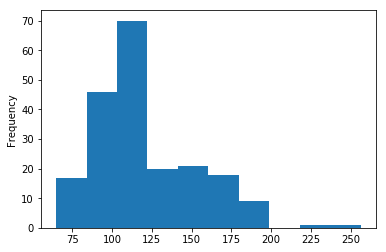

In [82]:
%matplotlib inline
cleaned_cars['normalized-losses'].plot.hist()

In [83]:
price = cleaned_cars['price']
norm_cars = (cleaned_cars-cleaned_cars.min())/(cleaned_cars.max() - cleaned_cars.min())
norm_cars['price'] = price

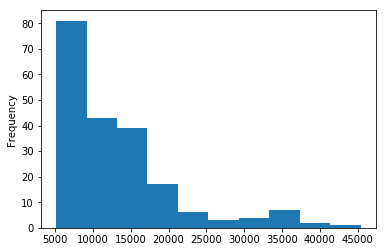

In [84]:
norm_cars['price'].plot.hist()

In [85]:
norm_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
curb-weight          0
compression-ratio    0
engine-size          0
price                0
bore-to-stroke       0
dtype: int64

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# A univariate k-nearest neighbors method
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
                   
    # Randomizing dataframe order
    random_idx = np.random.permutation(df.index)
    random_df = df.reindex(random_idx)
    
    # Splitting the dataframe in half for our train and test sets
    train_df = random_df.iloc[:random_df.shape[0]//2]
    test_df = random_df.iloc[random_df.shape[0]//2:]
    
    # Fit and calculate the RMSE value
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    prediction = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse**(1/2)
    
    return rmse

In [87]:
rmse_vals = {}
for col in norm_cars.columns:
    if col!='price':
        rmse_vals[col] = knn_train_test(col, 'price', norm_cars)
    
rmse_series = pd.Series(rmse_vals)
[print(key,'\n\t', val) for key, val in rmse_vals.items()]

normalized-losses 
	 8123.21948077
wheel-base 
	 5881.88030522
length 
	 5447.8444191
width 
	 4918.48644464
height 
	 7908.64395214
horsepower 
	 4915.79547686
peak-rpm 
	 8254.94734704
city-mpg 
	 5244.60896032
highway-mpg 
	 4320.79991746
curb-weight 
	 4419.74795173
compression-ratio 
	 7184.31116518
engine-size 
	 4224.04198543
bore-to-stroke 
	 6562.75727693


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [91]:
def knn_train_test(train_col, target_col, df, k_values=[5]):
    np.random.seed(1)
                   
    # Randomizing dataframe order
    random_idx = np.random.permutation(df.index)
    random_df = df.reindex(random_idx)
    
    # Splitting the dataframe in half for our train and test sets
    
    train_df = random_df.iloc[:random_df.shape[0]//2]
    test_df = random_df.iloc[random_df.shape[0]//2:]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        prediction = knn.predict(test_df[[train_col]])
    
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = mse**(1/2)
        k_rmse[k] = rmse
    
    return k_rmse

In [92]:
train_cols = norm_cars.columns.drop('price')

k_rmse_vals = {}
for col in train_cols:
    k_rmse_vals[col] = knn_train_test(col, 'price', norm_cars, k_values=[1,3,5,7,9])

k_rmse_vals

{'bore-to-stroke': {1: 6420.285358384539,
  3: 5973.9015973473333,
  5: 6562.7572769291492,
  7: 6426.6959961517996,
  9: 6718.9058490471234},
 'city-mpg': {1: 6295.507519143177,
  3: 5112.2448416671741,
  5: 5244.6089603169312,
  7: 5050.9055315187597,
  9: 4819.1590961745342},
 'compression-ratio': {1: 7449.2478508749118,
  3: 7334.4667588043994,
  5: 7184.3111651780637,
  7: 7295.0422728353897,
  9: 7333.3063852192354},
 'curb-weight': {1: 6006.7031785009058,
  3: 4431.178829494097,
  5: 4419.7479517285174,
  7: 4254.8532439597366,
  9: 4172.0307530938544},
 'engine-size': {1: 5101.7046080990676,
  3: 4296.0609397705784,
  5: 4224.0419854272141,
  7: 3881.3277282817871,
  9: 4033.9924896825601},
 'height': {1: 9617.9935217336224,
  3: 8180.4939258572285,
  5: 7908.6439521426373,
  7: 7974.7852607344075,
  9: 7937.0480330412456},
 'highway-mpg': {1: 4975.394275100577,
  3: 4394.3397736562383,
  5: 4320.7999174596607,
  7: 4272.6798689189118,
  9: 4330.8114888732143},
 'horsepower': {

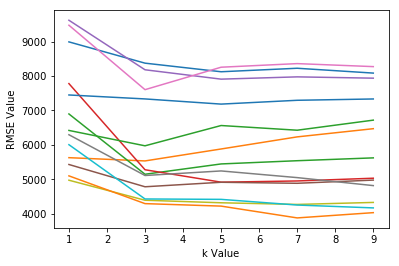

In [93]:
import matplotlib.pyplot as plt

for key, val in k_rmse_vals.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.plot(x,y)
    plt.xlabel('k Value')
    plt.ylabel('RMSE Value')
    
plt.show()

## Multivariate 

In [62]:
def knn_train_test(train_cols, target_col, df, k_values=[5]):
    np.random.seed(1)
                   
    # Randomizing dataframe order
    random_idx = np.random.permutation(df.index)
    random_df = df.reindex(random_idx)
    
    # Splitting the dataframe in half for our train and test sets
    train_df = random_df.iloc[:random_df.shape[0]//2]
    test_df = random_df.iloc[random_df.shape[0]//2:]
    
    k_rmse = {}
    
    for k in k_values:
        # Fit k nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Predict values using model
        prediction = knn.predict(test_df[train_cols])
        
        #calculate and return rmse
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = mse**(1/2)
        k_rmse[k] = rmse
    
    return k_rmse

In [63]:
rmse_series.sort_values()

highway-mpg          4874.808460
curb-weight          5119.199349
engine-size          5250.535905
length               5747.574667
city-mpg             5798.041469
horsepower           5826.040289
width                5920.613134
wheel-base           6261.399247
bore-to-stroke       6898.495448
compression-ratio    7419.710533
height               8060.677874
peak-rpm             8311.354513
normalized-losses    8404.840289
dtype: float64

In [64]:
two_best_features = ['highway-mpg', 'curb-weight']
multivar_rmse = {}

multivar_rmse["Two Best Features"] = knn_train_test(two_best_features, 'price', norm_cars)

three_best_features = ['highway-mpg', 'curb-weight', 'engine-size']
multivar_rmse["Three Best Features"] = knn_train_test(three_best_features, 'price', norm_cars)

four_best_features= ['engine-size', 'curb-weight', 'highway-mpg', 'length']
multivar_rmse["Four Best Features"] = knn_train_test(four_best_features, 'price', norm_cars)

five_best_features = ['engine-size', 'curb-weight', 'highway-mpg', 'city-mpg', 'length']
multivar_rmse["Five Best Features"] = knn_train_test(five_best_features, 'price', norm_cars)

six_best_features = ['engine-size', 'curb-weight', 'highway-mpg', 'city-mpg', 'length', 'horsepower']
multivar_rmse["Six Best Features"] = knn_train_test(six_best_features, 'price', norm_cars)

multivar_rmse

{'Five Best Features': {5: 4354.1126802770068},
 'Four Best Features': {5: 4226.1105671624773},
 'Six Best Features': {5: 4894.3096970048882},
 'Three Best Features': {5: 4538.1543019852743},
 'Two Best Features': {5: 4563.3316155341299}}

In [65]:
hyper_params = [x for x in range(1,25)]
hyper_params_rmse={}
hyper_params_rmse['Five Best'] = knn_train_test(five_best_features,'price',norm_cars,hyper_params)
hyper_params_rmse['Six Best'] = knn_train_test(six_best_features,'price',norm_cars,hyper_params)
hyper_params_rmse['Four Best'] = knn_train_test(four_best_features,'price',norm_cars,hyper_params)

hyper_params_rmse

{'Five Best': {1: 4499.0208248409945,
  2: 4030.8223705396813,
  3: 4228.8591120984638,
  4: 4231.191300169191,
  5: 4354.1126802770068,
  6: 4461.7490523570632,
  7: 4411.5933396356613,
  8: 4338.5943930192971,
  9: 4497.6908078346896,
  10: 4610.581647496907,
  11: 4757.5744986572581,
  12: 4843.442165065223,
  13: 4862.9479677872077,
  14: 4946.0894588476631,
  15: 5018.0410633714346,
  16: 5173.8087532719564,
  17: 5223.7639150058985,
  18: 5306.3823293264395,
  19: 5378.7108249362973,
  20: 5360.5201394195456,
  21: 5388.1332744535293,
  22: 5401.223070219371,
  23: 5436.3719353065644,
  24: 5546.7966067184316},
 'Four Best': {1: 4292.6870738181569,
  2: 4156.1134851529969,
  3: 4441.0501108573371,
  4: 4304.6638002532536,
  5: 4226.1105671624773,
  6: 4293.8050761690465,
  7: 4262.2363990103158,
  8: 4352.0506505075664,
  9: 4589.8159075411086,
  10: 4697.5255234360711,
  11: 4844.5478085547757,
  12: 4928.1009618315911,
  13: 4994.7147858134158,
  14: 5082.0576000897763,
  15: 5

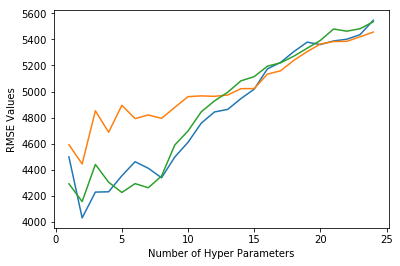

In [66]:
for key, val in hyper_params_rmse.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.plot(x,y)
    plt.xlabel('Number of Hyper Parameters')
    plt.ylabel('RMSE Values')
    
plt.show()